In [5]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
import datetime as dt

In [6]:
#Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
data = pd.read_csv('Final_dataset(cleaned).csv',encoding = "ISO-8859-1")

In [8]:
data.shape

(9006, 41)

In [9]:
data.head()

Unnamed: 0   Emp code   Employee Name  Designation  Process       Designation.1      Process.1 COE(Decision yet to be taken) Date Of Joining  Cleaned_Date Of Joining(Epoch time stamp) Date of Resignation(derivation needed) Date of Attrition(derivation needed) LWD(derivation needed)  LWD_Epoch_timestamp  Tenure(derivation needed)  Pre joining exp Fresher Previous Company Graduation_Cleaned Post Graduation_cleaned Diploma_cleaned Others_cleaned Raw Master Category_cleaned Notice period served          Voluntary / Forced Gender Rating Band       Company    Business  toatl leave  Total leaves in last 3 months         Interim Manager Last Shifts for person  No.of Transfers   Deparment                                  Permanent Address  Perm_Latitude(Model inclusion not permitted)  Perm_Longitude(Model inclusion not permitted) Date.of.Attrition(clean) Education_category
0         0.0  400001123  Sswvtz Pzwznr           0.0      0.0  Finance Controller        Finance                Rzqvss psznnz        2/14/2007                               1.171411e+09                                    NaN                       8/31/2007 0:00              8/31/2007           1188518400                      155.0              NaN       1              NaN         No details              No details      no details     no details                   Personal                     0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India     Support          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0     Support  P3B â 106 Princeton Estate, DLF Phase Five  ...                                     28.447799                                      77.095438                8/31/2007                  B
1         1.0  400005123    zwrtr yzqzq           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                       2/12/2008 0:00              2/22/2008           1203638400                      154.0              NaN       1              NaN         No details              No details      no details     no details                      Health                    0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...                                     28.604539                                      77.053158                2/12/2008                  B
2         2.0  400006123   zssrss nvstz           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                        9/9/2007 0:00               9/7/2007           1189123200                      154.0              NaN       1              NaN         No details              No details      no details     no details          Better opportunity                    0  Data to be derived/skimmed      M    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  A-80, Palam Vihar     0   Phone:  Mobile:9.911...                                     28.513878                                      77.023693                 9/9/2007                  B
3         3.0  400007123    zqzy Przszw           1.0      1.0             Analyst  Underpayments                           NaN        3/7/2007                               1.173226e+09                                    NaN                        1/7/2007 0:00              6/30/2007           1183161600                      154.0              NaN       1              NaN         No details              No details      no details     no details          Better opportunity      

In [10]:
data.dtypes

Unnamed: 0                                       float64
Emp code                                           int64
Employee Name                                     object
Designation                                      float64
Process                                          float64
Designation.1                                     object
Process.1                                         object
COE(Decision yet to be taken)                     object
Date Of Joining                                   object
Cleaned_Date Of Joining(Epoch time stamp)        float64
Date of Resignation(derivation needed)            object
Date of Attrition(derivation needed)              object
LWD(derivation needed)                            object
LWD_Epoch_timestamp                                int64
Tenure(derivation needed)                        float64
Pre joining exp                                  float64
Fresher                                           object
Previous Company               

In [11]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

percent_missing
Rating                                               71.441261
Previous Company                                     19.187209
Pre joining exp                                      18.809682
Perm_Longitude(Model inclusion not permitted)         9.171663
Perm_Latitude(Model inclusion not permitted)          9.171663
Date of Resignation(derivation needed)                8.238952
Permanent Address                                     7.006440
COE(Decision yet to be taken)                         5.740617
Date.of.Attrition(clean)                              1.021541
Date of Attrition(derivation needed)                  1.021541
LWD(derivation needed)                                0.532978
Company                                               0.011104
Business                                              0.011104
toatl leave                                           0.011104
Unnamed: 0                                            0.011104
Total leaves in last 3 months                         0.011104
Interim Manager                                       0.011104
Last Shifts for person                                0.011104
No.of Transfers                                       0.011104
Deparment                                             0.011104
Band                                                  0.011104
Diploma_cleaned                                       0.011104
Tenure(derivation needed)                             0.011104
Cleaned_Date Of Joining(Epoch time stamp)             0.011104
Employee Name                                         0.011104
Designation                                           0.011104
Process                                               0.011104
Designation.1                                         0.011104
Process.1                                             0.011104
Date Of Joining                                       0.011104
Education_category                                    0.011104
Graduation_Cleaned                                    0.011104
Post Graduation_cleaned                               0.011104
Others_cleaned                                        0.011104
Notice period served                                  0.000000
LWD_Epoch_timestamp                                   0.000000
Fresher                                               0.000000
Emp code                                              0.000000
Gender                                                0.000000
Voluntary / Forced                                    0.000000
Raw Master Category_cleaned                           0.000000

## As we see, rating which is one of the most important attribute has about 70% of it's data missing!

## > We will initially continue to find trends, where ratings are available.

In [12]:
data_rating = data[data['Rating'].notnull()]

In [13]:
data_rating.shape

(2572, 41)

### As we see, we suddenly lost about 70% of our total data!

###### Rating vs Band

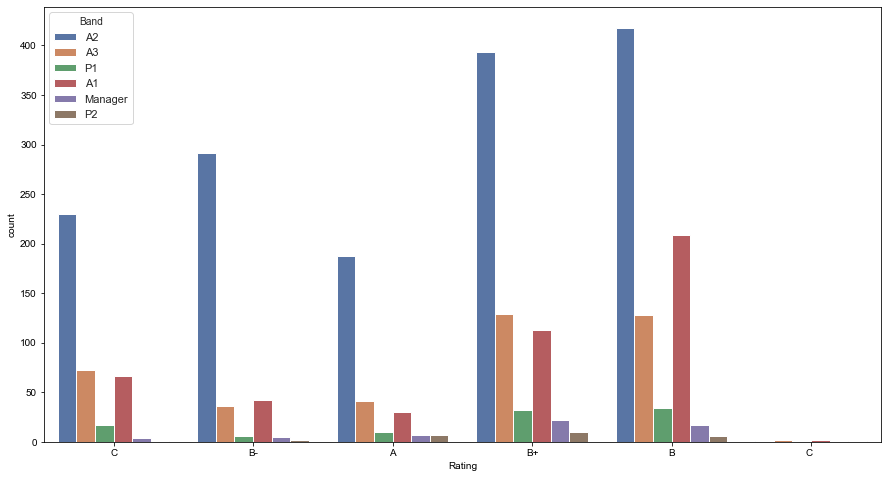

In [14]:
plt.subplots(figsize=(15,8)) 
sns.set(style="whitegrid")
ax = sns.countplot(x='Rating',hue='Band',  data=data_rating)
plt.show()

In [15]:
#Configuration
A1 = data[data['Band']=='A1']
A2 = data[data['Band']=='A2']
A3 = data[data['Band']=='A3']
Manager = data[data['Band']=='Manager']
P1 = data[data['Band']=='P1']
P2 = data[data['Band']=='P2']

Text(0, 0.5, 'Count')

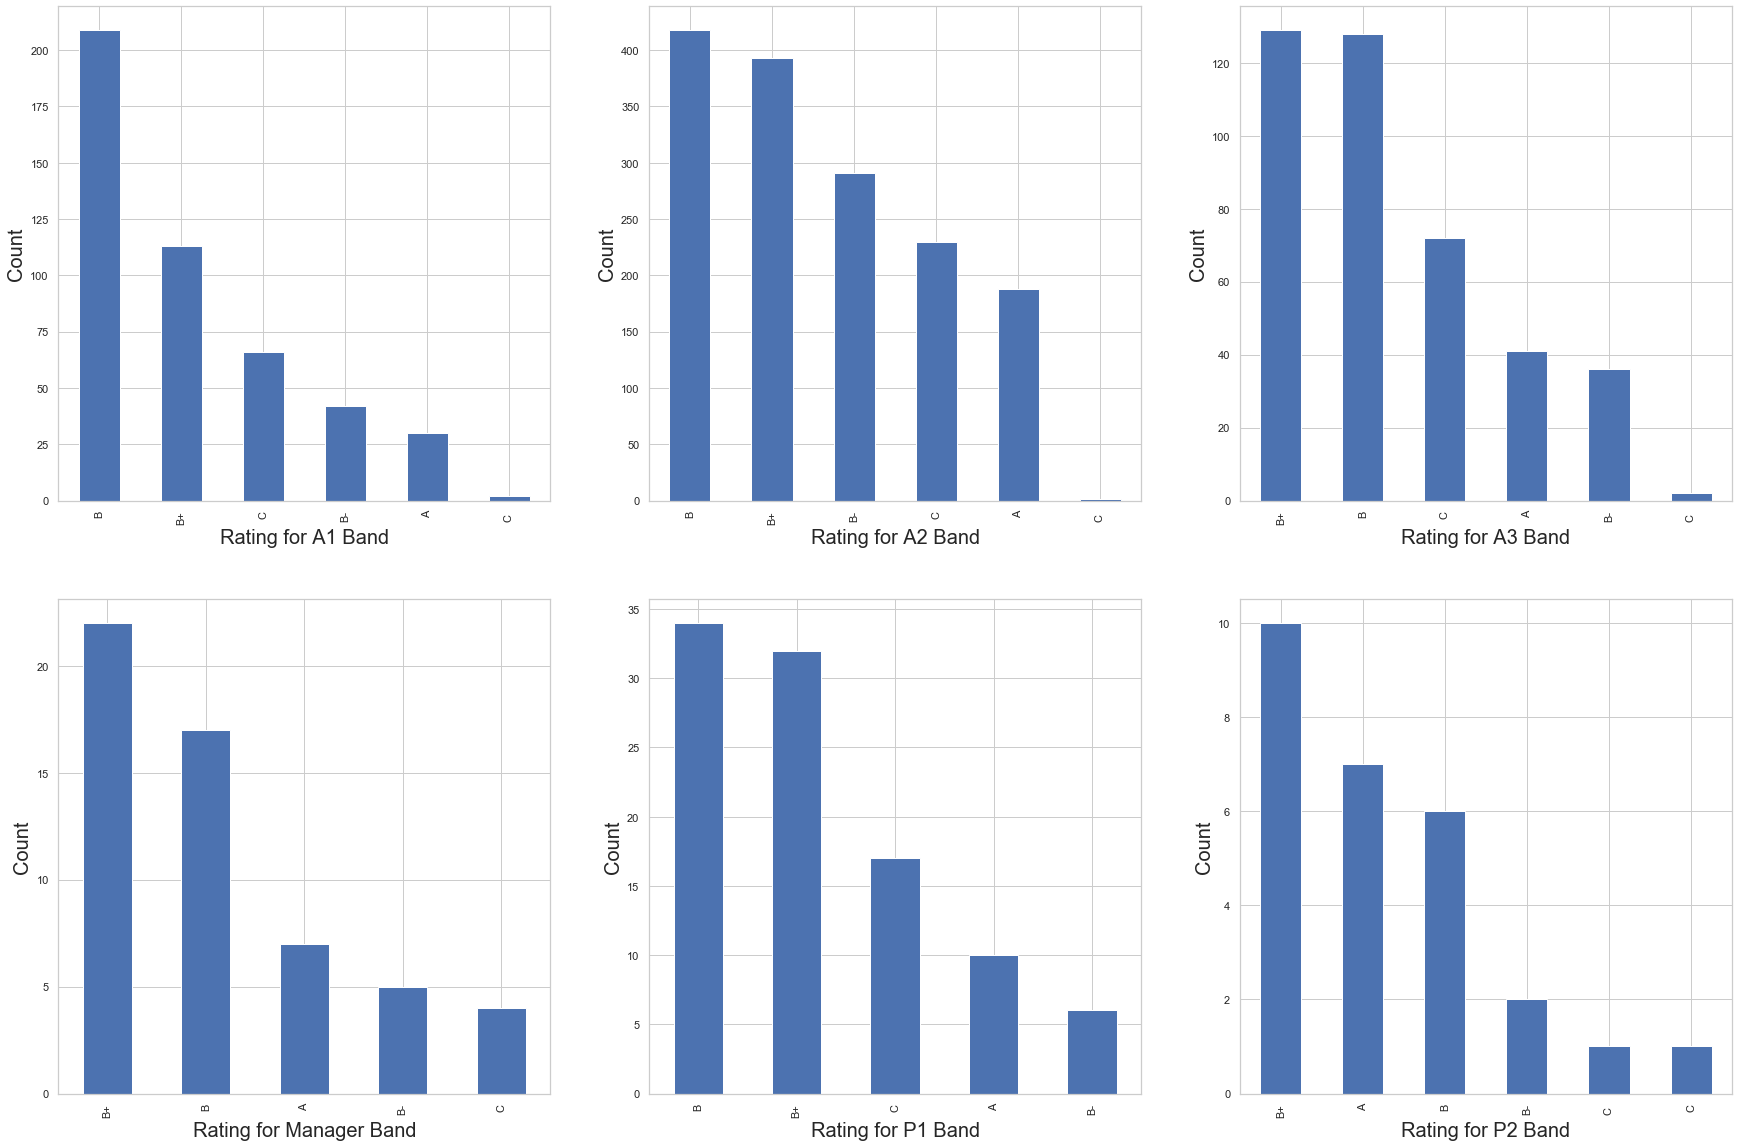

In [16]:
plt.subplots(figsize=(30,20)) 
plt.subplot(2,3,1)
A1['Rating'].describe()
A1['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for A1 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,2)
A2['Rating'].describe()
A2['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for A2 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,3)
A3['Rating'].describe()
A3['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for A3 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,4)
Manager['Rating'].describe()
Manager['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for Manager Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,5)
P1['Rating'].describe()
P1['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for P1 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(2,3,6)
P2['Rating'].describe()
P2['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating for P2 Band',fontsize=20)
plt.ylabel('Count',fontsize=20)

## Bands A3,Manager,P2 have the highest perfomance rating > 'B+'
## P2 has the best perfomance average

In [17]:
data.head()

Unnamed: 0   Emp code   Employee Name  Designation  Process       Designation.1      Process.1 COE(Decision yet to be taken) Date Of Joining  Cleaned_Date Of Joining(Epoch time stamp) Date of Resignation(derivation needed) Date of Attrition(derivation needed) LWD(derivation needed)  LWD_Epoch_timestamp  Tenure(derivation needed)  Pre joining exp Fresher Previous Company Graduation_Cleaned Post Graduation_cleaned Diploma_cleaned Others_cleaned Raw Master Category_cleaned Notice period served          Voluntary / Forced Gender Rating Band       Company    Business  toatl leave  Total leaves in last 3 months         Interim Manager Last Shifts for person  No.of Transfers   Deparment                                  Permanent Address  Perm_Latitude(Model inclusion not permitted)  Perm_Longitude(Model inclusion not permitted) Date.of.Attrition(clean) Education_category
0         0.0  400001123  Sswvtz Pzwznr           0.0      0.0  Finance Controller        Finance                Rzqvss psznnz        2/14/2007                               1.171411e+09                                    NaN                       8/31/2007 0:00              8/31/2007           1188518400                      155.0              NaN       1              NaN         No details              No details      no details     no details                   Personal                     0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India     Support          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0     Support  P3B â 106 Princeton Estate, DLF Phase Five  ...                                     28.447799                                      77.095438                8/31/2007                  B
1         1.0  400005123    zwrtr yzqzq           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                       2/12/2008 0:00              2/22/2008           1203638400                      154.0              NaN       1              NaN         No details              No details      no details     no details                      Health                    0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...                                     28.604539                                      77.053158                2/12/2008                  B
2         2.0  400006123   zssrss nvstz           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                        9/9/2007 0:00               9/7/2007           1189123200                      154.0              NaN       1              NaN         No details              No details      no details     no details          Better opportunity                    0  Data to be derived/skimmed      M    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  A-80, Palam Vihar     0   Phone:  Mobile:9.911...                                     28.513878                                      77.023693                 9/9/2007                  B
3         3.0  400007123    zqzy Przszw           1.0      1.0             Analyst  Underpayments                           NaN        3/7/2007                               1.173226e+09                                    NaN                        1/7/2007 0:00              6/30/2007           1183161600                      154.0              NaN       1              NaN         No details              No details      no details     no details          Better opportunity      

In [18]:
data[['data_month','data_day','data_year']]=data['Date.of.Attrition(clean)'].str.split('/',expand=True)

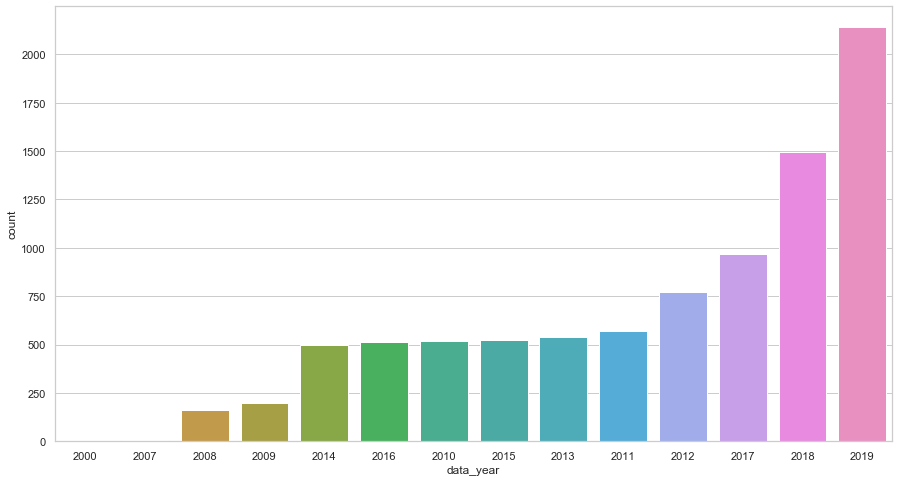

In [19]:
plt.subplots(figsize=(15,8))
sns.set(style="whitegrid")
ax = sns.countplot(x='data_year',order = data['data_year'].value_counts(ascending=True).index,
                   data=data)
#ax.legend(loc='upper left')
plt.show()

## No mathematical relation found between years and attrition rate!

In [20]:
data.head()

Unnamed: 0   Emp code   Employee Name  Designation  Process       Designation.1      Process.1 COE(Decision yet to be taken) Date Of Joining  Cleaned_Date Of Joining(Epoch time stamp) Date of Resignation(derivation needed) Date of Attrition(derivation needed) LWD(derivation needed)  LWD_Epoch_timestamp  Tenure(derivation needed)  Pre joining exp Fresher Previous Company Graduation_Cleaned Post Graduation_cleaned Diploma_cleaned Others_cleaned Raw Master Category_cleaned Notice period served          Voluntary / Forced Gender Rating Band       Company    Business  toatl leave  Total leaves in last 3 months         Interim Manager Last Shifts for person  No.of Transfers   Deparment                                  Permanent Address  Perm_Latitude(Model inclusion not permitted)  Perm_Longitude(Model inclusion not permitted) Date.of.Attrition(clean) Education_category data_month data_day data_year
0         0.0  400001123  Sswvtz Pzwznr           0.0      0.0  Finance Controller        Finance                Rzqvss psznnz        2/14/2007                               1.171411e+09                                    NaN                       8/31/2007 0:00              8/31/2007           1188518400                      155.0              NaN       1              NaN         No details              No details      no details     no details                   Personal                     0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India     Support          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0     Support  P3B â 106 Princeton Estate, DLF Phase Five  ...                                     28.447799                                      77.095438                8/31/2007                  B          8       31      2007
1         1.0  400005123    zwrtr yzqzq           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                       2/12/2008 0:00              2/22/2008           1203638400                      154.0              NaN       1              NaN         No details              No details      no details     no details                      Health                    0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...                                     28.604539                                      77.053158                2/12/2008                  B          2       12      2008
2         2.0  400006123   zssrss nvstz           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                        9/9/2007 0:00               9/7/2007           1189123200                      154.0              NaN       1              NaN         No details              No details      no details     no details          Better opportunity                    0  Data to be derived/skimmed      M    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  A-80, Palam Vihar     0   Phone:  Mobile:9.911...                                     28.513878                                      77.023693                 9/9/2007                  B          9        9      2007
3         3.0  400007123    zqzy Przszw           1.0      1.0             Analyst  Underpayments                           NaN        3/7/2007                               1.173226e+09                                    NaN                        1/7/2007 0:00              6/30/2007           1183161600                      154.0              NaN       1     

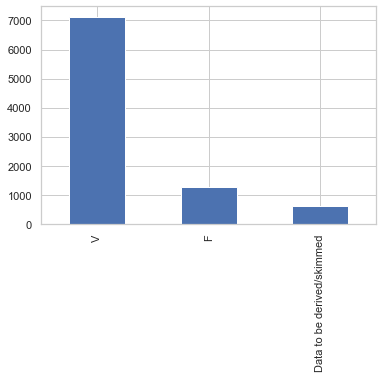

In [21]:
attrition_type = data[data['Voluntary / Forced'].notnull()]
attrition_type['Voluntary / Forced'].value_counts().plot(kind='bar')

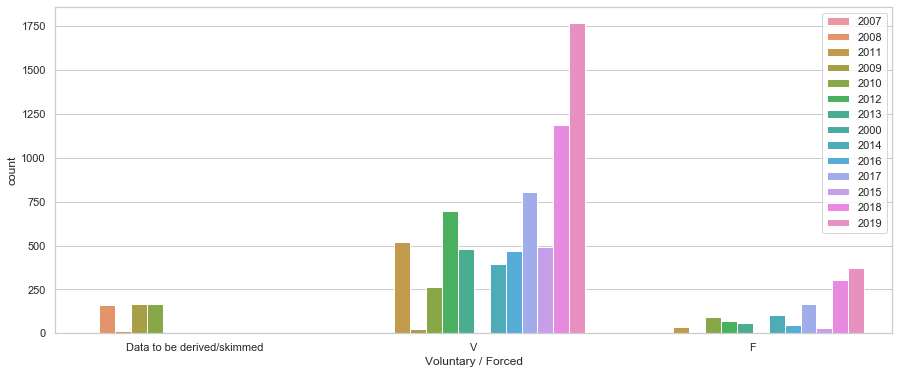

In [22]:
plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.countplot(x='Voluntary / Forced',hue='data_year',data=attrition_type)
ax.legend(loc='upper right')
plt.show()

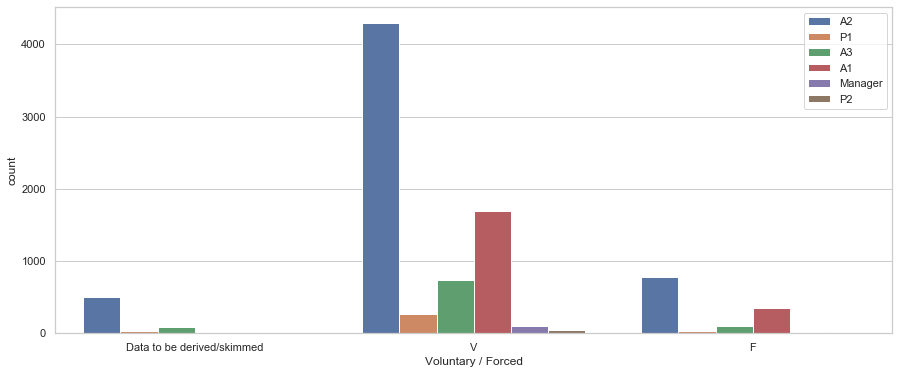

In [23]:
plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.countplot(x='Voluntary / Forced',hue='Band',data=attrition_type)
ax.legend(loc='upper right')
plt.show()

In [24]:
key='pk.eyJ1IjoibWhhdHJlYXB1cnZhIiwiYSI6ImNrNzZsejZteDBkOHMzZHJvaHdsZmliY3oifQ.24LeCR81rwaU9Y2sujou4Q'
fig = px.scatter_mapbox(data, lat="Perm_Latitude(Model inclusion not permitted)", lon="Perm_Longitude(Model inclusion not permitted)",color='Gender', 
                        hover_name="Emp code", hover_data=["Rating","Band"], zoom=3, height=500)
fig.update_layout(mapbox_style="basic", mapbox_accesstoken=key)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [25]:
key='pk.eyJ1IjoibWhhdHJlYXB1cnZhIiwiYSI6ImNrNzZsejZteDBkOHMzZHJvaHdsZmliY3oifQ.24LeCR81rwaU9Y2sujou4Q'
fig = px.scatter_mapbox(data_rating, lat="Perm_Latitude(Model inclusion not permitted)", lon="Perm_Longitude(Model inclusion not permitted)",color='Rating', 
                        hover_name="Emp code", hover_data=["Rating","Band"], zoom=3, height=500)
fig.update_layout(mapbox_style="basic", mapbox_accesstoken=key)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## No geographical trends were found w.r.t rating!

In [26]:
join_leave = data[data['Date Of Joining'].notnull()]
join_leave = data[data['Date.of.Attrition(clean)'].notnull()]

In [27]:
join_leave.head()

Unnamed: 0   Emp code   Employee Name  Designation  Process       Designation.1      Process.1 COE(Decision yet to be taken) Date Of Joining  Cleaned_Date Of Joining(Epoch time stamp) Date of Resignation(derivation needed) Date of Attrition(derivation needed) LWD(derivation needed)  LWD_Epoch_timestamp  Tenure(derivation needed)  Pre joining exp Fresher Previous Company Graduation_Cleaned Post Graduation_cleaned Diploma_cleaned Others_cleaned Raw Master Category_cleaned Notice period served          Voluntary / Forced Gender Rating Band       Company    Business  toatl leave  Total leaves in last 3 months         Interim Manager Last Shifts for person  No.of Transfers   Deparment                                  Permanent Address  Perm_Latitude(Model inclusion not permitted)  Perm_Longitude(Model inclusion not permitted) Date.of.Attrition(clean) Education_category data_month data_day data_year
0         0.0  400001123  Sswvtz Pzwznr           0.0      0.0  Finance Controller        Finance                Rzqvss psznnz        2/14/2007                               1.171411e+09                                    NaN                       8/31/2007 0:00              8/31/2007           1188518400                      155.0              NaN       1              NaN         No details              No details      no details     no details                   Personal                     0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India     Support          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0     Support  P3B â 106 Princeton Estate, DLF Phase Five  ...                                     28.447799                                      77.095438                8/31/2007                  B          8       31      2007
1         1.0  400005123    zwrtr yzqzq           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                       2/12/2008 0:00              2/22/2008           1203638400                      154.0              NaN       1              NaN         No details              No details      no details     no details                      Health                    0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...                                     28.604539                                      77.053158                2/12/2008                  B          2       12      2008
2         2.0  400006123   zssrss nvstz           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                        9/9/2007 0:00               9/7/2007           1189123200                      154.0              NaN       1              NaN         No details              No details      no details     no details          Better opportunity                    0  Data to be derived/skimmed      M    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  A-80, Palam Vihar     0   Phone:  Mobile:9.911...                                     28.513878                                      77.023693                 9/9/2007                  B          9        9      2007
3         3.0  400007123    zqzy Przszw           1.0      1.0             Analyst  Underpayments                           NaN        3/7/2007                               1.173226e+09                                    NaN                        1/7/2007 0:00              6/30/2007           1183161600                      154.0              NaN       1     

In [28]:
join_leave[['data_join_month','data_join_day','data_join_year']]=join_leave['Date Of Joining'].str.split('/',expand=True)


C:\Users\USER\Anaconda3.1\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
join_leave.head()

Unnamed: 0   Emp code   Employee Name  Designation  Process       Designation.1      Process.1 COE(Decision yet to be taken) Date Of Joining  Cleaned_Date Of Joining(Epoch time stamp) Date of Resignation(derivation needed) Date of Attrition(derivation needed) LWD(derivation needed)  LWD_Epoch_timestamp  Tenure(derivation needed)  Pre joining exp Fresher Previous Company Graduation_Cleaned Post Graduation_cleaned Diploma_cleaned Others_cleaned Raw Master Category_cleaned Notice period served          Voluntary / Forced Gender Rating Band       Company    Business  toatl leave  Total leaves in last 3 months         Interim Manager Last Shifts for person  No.of Transfers   Deparment                                  Permanent Address  Perm_Latitude(Model inclusion not permitted)  Perm_Longitude(Model inclusion not permitted) Date.of.Attrition(clean) Education_category data_month data_day data_year data_join_month data_join_day data_join_year
0         0.0  400001123  Sswvtz Pzwznr           0.0      0.0  Finance Controller        Finance                Rzqvss psznnz        2/14/2007                               1.171411e+09                                    NaN                       8/31/2007 0:00              8/31/2007           1188518400                      155.0              NaN       1              NaN         No details              No details      no details     no details                   Personal                     0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India     Support          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0     Support  P3B â 106 Princeton Estate, DLF Phase Five  ...                                     28.447799                                      77.095438                8/31/2007                  B          8       31      2007               2            14           2007
1         1.0  400005123    zwrtr yzqzq           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                       2/12/2008 0:00              2/22/2008           1203638400                      154.0              NaN       1              NaN         No details              No details      no details     no details                      Health                    0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...                                     28.604539                                      77.053158                2/12/2008                  B          2       12      2008               3             5           2007
2         2.0  400006123   zssrss nvstz           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                        9/9/2007 0:00               9/7/2007           1189123200                      154.0              NaN       1              NaN         No details              No details      no details     no details          Better opportunity                    0  Data to be derived/skimmed      M    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  A-80, Palam Vihar     0   Phone:  Mobile:9.911...                                     28.513878                                      77.023693                 9/9/2007                  B          9        9      2007               3             5           2007
3         3.0  400007123    zqzy Przszw           1.0      1.0             Analyst  Underpayments                           NaN        3/7/2007                               1.173226e

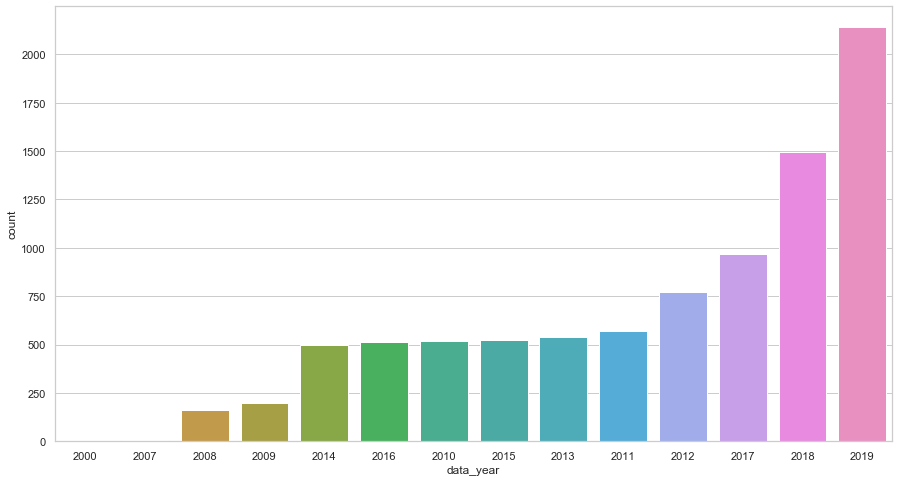

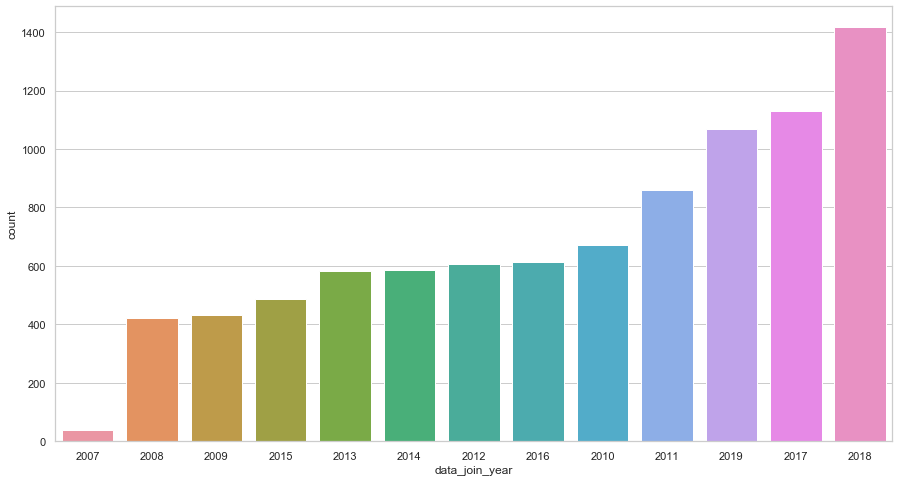

In [30]:
plt.subplots(figsize=(15,8))
sns.set(style="whitegrid")
ax = sns.countplot(x='data_year',order = data['data_year'].value_counts(ascending=True).index,
                   data=data)
#ax.legend(loc='upper left')
plt.show()
plt.subplots(figsize=(15,8))
sns.set(style="whitegrid")
ax = sns.countplot(x='data_join_year',order = join_leave['data_join_year'].value_counts(ascending=True).index,
                   data=join_leave)
#ax.legend(loc='upper left')
plt.show()

## As we see the hiring rate has increased in the coming years, so more attrition is bound to happen.

In [31]:
join_leave['Working Tenure'] = (pd.to_datetime(join_leave['Date.of.Attrition(clean)'])-pd.to_datetime(join_leave['Date Of Joining'])).dt.days

C:\Users\USER\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
join_leave=join_leave.reset_index()
join_leave.head()

index  Unnamed: 0   Emp code   Employee Name  Designation  Process       Designation.1      Process.1 COE(Decision yet to be taken) Date Of Joining  Cleaned_Date Of Joining(Epoch time stamp) Date of Resignation(derivation needed) Date of Attrition(derivation needed) LWD(derivation needed)  LWD_Epoch_timestamp  Tenure(derivation needed)  Pre joining exp Fresher Previous Company Graduation_Cleaned Post Graduation_cleaned Diploma_cleaned Others_cleaned Raw Master Category_cleaned Notice period served          Voluntary / Forced Gender Rating Band       Company    Business  toatl leave  Total leaves in last 3 months         Interim Manager Last Shifts for person  No.of Transfers   Deparment                                  Permanent Address  Perm_Latitude(Model inclusion not permitted)  Perm_Longitude(Model inclusion not permitted) Date.of.Attrition(clean) Education_category data_month data_day data_year data_join_month data_join_day data_join_year  Working Tenure
0      0         0.0  400001123  Sswvtz Pzwznr           0.0      0.0  Finance Controller        Finance                Rzqvss psznnz        2/14/2007                               1.171411e+09                                    NaN                       8/31/2007 0:00              8/31/2007           1188518400                      155.0              NaN       1              NaN         No details              No details      no details     no details                   Personal                     0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India     Support          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0     Support  P3B â 106 Princeton Estate, DLF Phase Five  ...                                     28.447799                                      77.095438                8/31/2007                  B          8       31      2007               2            14           2007             198
1      1         1.0  400005123    zwrtr yzqzq           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                       2/12/2008 0:00              2/22/2008           1203638400                      154.0              NaN       1              NaN         No details              No details      no details     no details                      Health                    0  Data to be derived/skimmed      F    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  Flat-46,IES Appartments,Sector-4, Plot-9,Dwark...                                     28.604539                                      77.053158                2/12/2008                  B          2       12      2008               3             5           2007             344
2      2         2.0  400006123   zssrss nvstz           1.0      1.0             Analyst  Underpayments                           NaN        3/5/2007                               1.173053e+09                                    NaN                        9/9/2007 0:00               9/7/2007           1189123200                      154.0              NaN       1              NaN         No details              No details      no details     no details          Better opportunity                    0  Data to be derived/skimmed      M    NaN   A2  R1 RCM India  Operations          0.0                            0.0  Yzwvrnwvr Srnts qzspzo     3:00 PM - 12:00 AM              0.0  Operations  A-80, Palam Vihar     0   Phone:  Mobile:9.911...                                     28.513878                                      77.023693                 9/9/2007                  B          9        9      2007               3             5           2007             188
3      3         3.0  400007123    zqzy Przszw           1.0      1.0             Analyst  

## Let's try to switch to tenure which is another important attribute!